# Исследовательский анализ данных  сервиса Яндекс.Афиши в Python и проверка гипотез

**Автор: Арамян Элен**

**Дата: 01.04.2025**

##   Описание данных
Первый датасет final_tickets_orders_df.csv включает информацию обо всех заказах билетов:
+ order_id — уникальный идентификатор заказа.
+ user_id — уникальный идентификатор пользователя.
+ created_dt_msk — дата создания заказа (московское время).
+ created_ts_msk — дата и время создания заказа (московское время).
+ event_id — идентификатор мероприятия из таблицы events.
+ cinema_circuit — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.
+ age_limit — возрастное ограничение мероприятия.
+ currency_code — валюта оплаты, например rub для российских рублей.
+ device_type_canonical — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных.
+ revenue — выручка от заказа.
+ service_name — название билетного оператора.
+ tickets_count — количество купленных билетов.
+ total — общая сумма заказа.
+ days_since_prev - количество дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.

Второй датасет final_tickets_events_df содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия. Датасет содержит такие поля:
+ event_id — уникальный идентификатор мероприятия.
+ event_name — название мероприятия. Аналог поля event_name_code из исходной базы данных.
+ event_type_description — описание типа мероприятия.
+ event_type_main — основной тип мероприятия: театральная постановка, концерт и так далее.
+ organizers — организаторы мероприятия.
+ region_name — название региона.
+ city_name — название города.
+ venue_id — уникальный идентификатор площадки.
+ venue_name — название площадки.
+ venue_address — адрес площадки.

Датасет final_tickets_tenge_df.csv с информацией о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге. Датасет содержит такие поля:
+ nominal — номинал (100 тенге).
+ data — дата.
+ curs — курс тенге к рублю.
+ cdx — обозначение валюты (kzt).

## Цели и задачи проекта

**Цель:** проведение исследовательского анализа данных в Python, чтобы выявить инсайты об изменении пользовательских предпочтений и популярности событий осенью 2024 года, а также проверить гипотезы о разнице в поведении пользователей с мобильными и стационарными устройствами.

**Задачи:**
1) загрузка данных и знакомство с ними

2) предобработка данных и их нормализация

3) исследовательский анализ данных

3) проверка гипотез о поведении пользовательей мобильной и десктопной приложений

## Содержание проекта
1. Загрузка данных и знакомство с ними

2. Предобработка данных и подготовка их к исследованию

3. Исследовательский анализ данных

    3.1. Анализ распределения заказов по сегментам и их сезонные изменения
    
    3.2. Осенняя активность пользователей
    
    3.3. Популярные события и партнёры
    

4. Статистический анализ данных

5. Общий вывод и рекомендации

## Загрузка данных и знакомство с ними (шаг 1) 

Загрузите данные и получите первую информацию о них. Оцените объём данных, их корректность и соответствие описанию, а также предположите, какие шаги необходимо сделать на стадии предобработки данных. Основные моменты зафиксируйте в промежуточном выводе. 

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

In [2]:
# Загружаем данные в датасеты
URL = '/datasets/'
purchases = pd.read_csv(URL + 'final_tickets_orders_df.csv')
events = pd.read_csv(URL + 'final_tickets_events_df.csv')
tenge = pd.read_csv(URL + 'final_tickets_tenge_df.csv')

Изучим датасет **purchases**

In [3]:
purchases.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [4]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

Изучим датасет **events**

In [5]:
events.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [6]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


Изучим датасет **tenge**

In [7]:
tenge.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [8]:
tenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


Познакомившись с датасетами видим, что все данные соответствуют описанию и не содержат пропусков (кроме столбца `days_since_prev` из таблицы `purchases`, где пропуски возможны). Также можно заметить, что столбцы с датой/датой и временем содержат некорректный тип данных - ниже поправим это

## Предобработка данных и подготовка их к исследованию (шаг 2)

Проведите предобработку данных:
+ **Проверьте данные на пропуски.** Проверьте, что выгрузка данных из SQL была успешной. Кроме столбца days_since_prev, данные не должны содержать пропусков.
+**Изучите значения в ключевых столбцах** и при обнаружении ошибок обработайте их. 
    + **Для категориальных значений** изучите, какие категории присутствуют в данных. Проверьте, встречаются ли значения, которые могут обозначать пропуски в данных или отсутствие информации. Проведите нормализацию данных, если это необходимо. 
    + **Для количественных значений** посмотрите на распределение и наличие выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха. Для анализа данных важными показателями являются выручка с заказа revenue и количество билетов в заказе tickets_count, поэтому в первую очередь проверьте данные в этих столбцах. Если найдутся выбросы в выручке с заказа revenue, то отберите значения по 99-му процентилю. Не забудьте, что данные изначально были представлены в разных валютах, поэтому разделите анализ на рубли и тенге. 
+ **Проверьте явные и неявные дубликаты.** Сделайте акцент на неявных дубликатах по бронированию билета без учёта идентификаторов заказа и, если такие будут, примите обоснованное решение, как их стоит обработать. 
+ **Проведите преобразования типов данных.** Обратите внимание на типы данных с датой и временем, а также проверьте возможность снижения размерности количественных данных. 
+ **Создайте несколько новых столбцов:**
    + revenue_rub — приведите выручку с заказа к единой валюте — российскому рублю. Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю final_tickets_tenge_df.csv за 2024 год. Значения в рублях представлены для 100 тенге. 
    + one_ticket_revenue_rub — рассчитайте выручку с продажи одного билета на мероприятие. 
    + month — выделите месяц оформления заказа в отдельный столбец. 
    + season — создайте столбец с информацией о сезонности, включая такие категории, как: 'лето', 'осень', 'зима', 'весна'. 
    
    
Рекомендация: вначале можно объединить данные в один датафрейм, а затем провести общую предобработку. **ок**

После предобработки проверьте, сколько данных вы отобрали, если выполняли фильтрацию, а также дайте промежуточный вывод с основными действиями и описанием новых столбцов.

In [9]:
# Сначала объединим все 3 датасета в единый df
purchases = purchases.merge(events, on='event_id', how='inner')
purchases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290611 non-null  int64  
 1   user_id                 290611 non-null  object 
 2   created_dt_msk          290611 non-null  object 
 3   created_ts_msk          290611 non-null  object 
 4   event_id                290611 non-null  int64  
 5   cinema_circuit          290611 non-null  object 
 6   age_limit               290611 non-null  int64  
 7   currency_code           290611 non-null  object 
 8   device_type_canonical   290611 non-null  object 
 9   revenue                 290611 non-null  float64
 10  service_name            290611 non-null  object 
 11  tickets_count           290611 non-null  int64  
 12  total                   290611 non-null  float64
 13  days_since_prev         268698 non-null  float64
 14  event_name          

Видим, что столбцы `created_dt_msk` и `created_ts_msk` содержат некорретный тип данных - object, аналогично и `data` в датафрейме `tenge`, поэтому для дальнейшего присоединения `purchases` с `tenge` заменим в обоих датасетах тип столбцов на корректный

In [10]:
# Преобразуем типы данных на корректные
purchases[['created_dt_msk', 'created_ts_msk']] = purchases[['created_dt_msk', 'created_ts_msk']].astype('datetime64[ns]')

tenge['data'] = tenge['data'].astype('datetime64[ns]')

In [11]:
print(purchases.info())
print(tenge.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290611 non-null  int64         
 1   user_id                 290611 non-null  object        
 2   created_dt_msk          290611 non-null  datetime64[ns]
 3   created_ts_msk          290611 non-null  datetime64[ns]
 4   event_id                290611 non-null  int64         
 5   cinema_circuit          290611 non-null  object        
 6   age_limit               290611 non-null  int64         
 7   currency_code           290611 non-null  object        
 8   device_type_canonical   290611 non-null  object        
 9   revenue                 290611 non-null  float64       
 10  service_name            290611 non-null  object        
 11  tickets_count           290611 non-null  int64         
 12  total                   290611

In [12]:
# Объединим 2 датасета с tenge
df = purchases.merge(tenge, left_on='created_dt_msk', right_on='data')
df.sample(7)

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx
286247,1553937,d4f86a2e47f76dc,2024-07-01,2024-07-01 19:27:17,541345,нет,12,rub,mobile,452.73,...,Североярская область,Озёрск,2,2805,"Центр культурного наследия ""Заряд"" и партнеры","ш. Пугачева, д. 9/7 к. 39",2024-07-01,100,18.4198,kzt
272449,3565580,d5f07a65694f995,2024-07-14,2024-07-14 23:22:52,379266,нет,0,rub,mobile,107.96,...,Североярская область,Озёрск,2,1283,"Клуб начинающих писателей ""Детство"" Лимитед","ул. Заозерная, д. 9",2024-07-14,100,18.5010,kzt
124864,7902269,dee8771de6229c6,2024-10-04,2024-10-04 12:26:56,485007,нет,0,rub,mobile,1273.19,...,Каменевский регион,Глиногорск,213,4507,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-04,100,19.6648,kzt
189774,2244195,0beb8fc0c0a9ce1,2024-09-03,2024-09-03 11:10:09,563901,нет,0,rub,mobile,68.71,...,Медовская область,Радужсвет,47,2157,"Студия дизайна ""Платформа"" Инкорпорэйтед","наб. Магистральная, д. 5",2024-09-03,100,18.6868,kzt
56902,1446898,0beb8fc0c0a9ce1,2024-10-17,2024-10-17 11:59:23,169844,нет,6,rub,desktop,639.79,...,Светополянский округ,Глиноград,54,4038,"Кинокомпания ""Прозрачность"" Инкорпорэйтед","пр. Омский, д. 7/3 стр. 9",2024-10-17,100,19.9534,kzt
81053,3982107,8d6c1ff89fac35f,2024-08-25,2024-08-25 12:48:55,559625,нет,18,rub,mobile,3417.78,...,Каменевский регион,Глиногорск,213,1236,"Центр традиционных ремесел ""Тепло"" и партнеры","алл. Димитрова, д. 651 к. 27",2024-08-25,100,19.1202,kzt
215939,4043906,8ed1134f01bb82b,2024-09-28,2024-09-28 18:18:16,506552,нет,16,rub,mobile,337.12,...,Каменевский регион,Глиногорск,213,1365,"Картинная галерея ""Светлячок"" Лтд","ул. Дальневосточная, д. 97 к. 1/4",2024-09-28,100,19.3741,kzt


In [13]:
df.info()

# Сохраним начальное кол-во строк
initial_row_count = df.shape[0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290611 non-null  int64         
 1   user_id                 290611 non-null  object        
 2   created_dt_msk          290611 non-null  datetime64[ns]
 3   created_ts_msk          290611 non-null  datetime64[ns]
 4   event_id                290611 non-null  int64         
 5   cinema_circuit          290611 non-null  object        
 6   age_limit               290611 non-null  int64         
 7   currency_code           290611 non-null  object        
 8   device_type_canonical   290611 non-null  object        
 9   revenue                 290611 non-null  float64       
 10  service_name            290611 non-null  object        
 11  tickets_count           290611 non-null  int64         
 12  total                   290611

О корректности типов данных (раз уж начала с датами работать) - можно также понизить разрядность столбцов, содержащих тип данных int и float

In [14]:
# Меняем тип данных с помощью цикла
for col in ['order_id','event_id', 'age_limit', 'tickets_count', 'nominal', 'city_id', 'venue_id']:
    df[col] = pd.to_numeric(df[col], downcast='integer')
    
for col in ['revenue','total', 'days_since_prev', 'curs']:
    df[col] = pd.to_numeric(df[col], downcast='float')

In [15]:
# Проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290611 non-null  int32         
 1   user_id                 290611 non-null  object        
 2   created_dt_msk          290611 non-null  datetime64[ns]
 3   created_ts_msk          290611 non-null  datetime64[ns]
 4   event_id                290611 non-null  int32         
 5   cinema_circuit          290611 non-null  object        
 6   age_limit               290611 non-null  int8          
 7   currency_code           290611 non-null  object        
 8   device_type_canonical   290611 non-null  object        
 9   revenue                 290611 non-null  float32       
 10  service_name            290611 non-null  object        
 11  tickets_count           290611 non-null  int8          
 12  total                   290611

Далее, для правильного анализа данных нужно привести выручку к единой валюте - к рублям (и только после этого приступить к изучению датасета). Для этого добавим столбец `revenue_rub`, содержащий выручку в рублях

In [16]:
# Напишем пользовательскую функцию, которая сконвертирует тенге в рубли
def calculate_revenue_to_rub(row):
    if row['currency_code'] == 'kzt':
        kurs = row['curs'] / row['nominal'] 
        return row['revenue'] * kurs
    else:
        return row['revenue']

df['revenue_rub'] = df.apply(calculate_revenue_to_rub, axis=1)      

In [17]:
# Проверка
print(df.info())
df[df['currency_code']== 'kzt'] # Переведем пару значений тенге в рубли самостоятельно и сравним результаты - ура ура сошлось!!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290611 entries, 0 to 290610
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290611 non-null  int32         
 1   user_id                 290611 non-null  object        
 2   created_dt_msk          290611 non-null  datetime64[ns]
 3   created_ts_msk          290611 non-null  datetime64[ns]
 4   event_id                290611 non-null  int32         
 5   cinema_circuit          290611 non-null  object        
 6   age_limit               290611 non-null  int8          
 7   currency_code           290611 non-null  object        
 8   device_type_canonical   290611 non-null  object        
 9   revenue                 290611 non-null  float32       
 10  service_name            290611 non-null  object        
 11  tickets_count           290611 non-null  int8          
 12  total                   290611

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub
197,7315193,3ee7dc2e115847f,2024-08-20,2024-08-20 17:11:15,533803,нет,16,kzt,mobile,1849.410034,...,Широковка,162,3407,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7",2024-08-20,100,18.697201,kzt,345.787907
198,5512843,6c343a9a8a5fb89,2024-08-20,2024-08-20 14:51:57,533803,нет,16,kzt,mobile,5548.240234,...,Широковка,162,3407,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7",2024-08-20,100,18.697201,kzt,1037.365616
199,5512785,6c343a9a8a5fb89,2024-08-20,2024-08-20 15:00:41,533803,нет,16,kzt,mobile,1849.410034,...,Широковка,162,3407,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7",2024-08-20,100,18.697201,kzt,345.787907
200,5512814,6c343a9a8a5fb89,2024-08-20,2024-08-20 14:55:30,533803,нет,16,kzt,mobile,5548.240234,...,Широковка,162,3407,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7",2024-08-20,100,18.697201,kzt,1037.365616
201,7134697,8a3dacb24c96aa2,2024-08-20,2024-08-20 07:56:42,533803,нет,16,kzt,mobile,1849.410034,...,Широковка,162,3407,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7",2024-08-20,100,18.697201,kzt,345.787907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289705,2844901,655911492b87f97,2024-06-14,2024-06-14 00:31:07,536825,нет,12,kzt,mobile,13784.259766,...,Широковка,162,2169,"Кладбище искусств ""Феномен"" Инк","ш. Саратовское, д. 73 стр. 367",2024-06-14,100,19.525000,kzt,2691.376667
289706,4037149,7eb4fc207ecc10f,2024-06-14,2024-06-14 09:31:53,536825,нет,12,kzt,mobile,3446.060059,...,Широковка,162,2169,"Кладбище искусств ""Феномен"" Инк","ш. Саратовское, д. 73 стр. 367",2024-06-14,100,19.525000,kzt,672.843213
289707,8474236,c6ef049c34ebdc5,2024-06-14,2024-06-14 09:18:47,536825,нет,12,kzt,mobile,10338.190430,...,Широковка,162,2169,"Кладбище искусств ""Феномен"" Инк","ш. Саратовское, д. 73 стр. 367",2024-06-14,100,19.525000,kzt,2018.531642
289708,8474265,c6ef049c34ebdc5,2024-06-14,2024-06-14 09:22:54,536825,нет,12,kzt,mobile,3446.060059,...,Широковка,162,2169,"Кладбище искусств ""Феномен"" Инк","ш. Саратовское, д. 73 стр. 367",2024-06-14,100,19.525000,kzt,672.843213


**Далее изучим значения в ключевых столбцах**

In [18]:
df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.939941,...,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.697201,kzt,1521.939941
1,6274963,44c1c640a242aea,2024-08-20,2024-08-20 22:12:04,237325,нет,0,rub,mobile,144.729996,...,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-08-20,100,18.697201,kzt,144.729996
2,474528,2b1f730d7024681,2024-08-20,2024-08-20 15:29:56,373657,нет,18,rub,mobile,318.269989,...,Озёрск,2,1631,"Музей истории ""Воспоминание"" Групп","наб. Тамбовская, д. 1/4 к. 577",2024-08-20,100,18.697201,kzt,318.269989
3,7477361,05ba93f1b1e1fdd,2024-08-20,2024-08-20 17:06:44,534657,нет,16,rub,mobile,339.609985,...,Кокжар,20,2866,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50",2024-08-20,100,18.697201,kzt,339.609985
4,472150,3ee7dc2e115847f,2024-08-20,2024-08-20 02:57:22,534657,нет,16,rub,mobile,339.609985,...,Кокжар,20,2866,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50",2024-08-20,100,18.697201,kzt,339.609985


In [19]:
# Изучим категориальные значения в ключевых столбцах датасета
for column in ['age_limit', 'service_name', 'currency_code', 'device_type_canonical', 'venue_name', 'event_type_description', 'event_type_main']:
    print(f'Уникальные значения в {column}:')
    print(df[column].unique())

Уникальные значения в age_limit:
[16  0 18  6 12]
Уникальные значения в service_name:
['Край билетов' 'Мой билет' 'Облачко' 'Быстробилет' 'Билеты без проблем'
 'Весь в билетах' 'Билеты в руки' 'Прачечная' 'Лови билет!'
 'Лучшие билеты' 'Дом культуры' 'За билетом!' 'Яблоко' 'Show_ticket'
 'Тебе билет!' 'Мир касс' 'Выступления.ру' 'Восьмёрка'
 'Городской дом культуры' 'Росбилет' 'Вперёд!' 'Crazy ticket!' 'Телебилет'
 'Радио ticket' 'Кино билет' 'Зе Бест!' 'КарандашРУ' 'Шоу начинается!'
 'Лимоны' 'Билет по телефону' 'Тех билет' 'Дырокол' 'Быстрый кассир'
 'Реестр' 'Цвет и билет' 'Билеты в интернете']
Уникальные значения в currency_code:
['rub' 'kzt']
Уникальные значения в device_type_canonical:
['mobile' 'desktop']
Уникальные значения в venue_name:
['Сценический центр "Деталь" Групп'
 'Музыкальная школа для детей "Аккаунт" Лтд'
 'Музей истории "Воспоминание" Групп' ...
 'Фонд искусств "Синие" и партнеры'
 'Образовательное учреждение искусства "Эксперт" Инкорпорэйтед'
 'Клуб стендап-комеди

In [20]:
# Изучим количественные значения в ключевых столбцах датасета
for column in ['revenue_rub', 'tickets_count']:
    print(f'Описание столбца {column}:')
    print(df[column].describe())
    print()

Описание столбца revenue_rub:
count    290611.000000
mean        555.571986
std         875.498165
min         -90.760002
25%         113.970001
50%         351.140015
75%         802.049988
max       81174.539062
Name: revenue_rub, dtype: float64

Описание столбца tickets_count:
count    290611.000000
mean          2.754311
std           1.170620
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          57.000000
Name: tickets_count, dtype: float64



В категориальных данных датасета `df` все корректно. В количественных же данных: 
 + в столбце `revenue_rub` видим выбросы в большую сторону
 + в столбце `tickets_count` видим очень большое макс кол-во билетов - 57. Необходимо проверить, ок это или нет

In [21]:
# Проверим сначала выбросы по полю tickets_count
df[df['tickets_count']>15]

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub
8036,3526546,7eb4fc207ecc10f,2024-08-29,2024-08-29 12:55:06,557574,нет,0,rub,desktop,0.000000,...,Глиногорск,213,1614,"Культурный центр ""Общие"" Групп","ул. Владимирская, д. 87 стр. 4",2024-08-29,100,19.027599,kzt,0.000000
8037,3526604,7eb4fc207ecc10f,2024-08-29,2024-08-29 12:57:45,557574,нет,0,rub,desktop,0.000000,...,Глиногорск,213,1614,"Культурный центр ""Общие"" Групп","ул. Владимирская, д. 87 стр. 4",2024-08-29,100,19.027599,kzt,0.000000
8038,3526633,7eb4fc207ecc10f,2024-08-29,2024-08-29 13:03:47,215381,нет,0,rub,desktop,0.000000,...,Глиногорск,213,1614,"Культурный центр ""Общие"" Групп","ул. Владимирская, д. 87 стр. 4",2024-08-29,100,19.027599,kzt,0.000000
8039,3526575,7eb4fc207ecc10f,2024-08-29,2024-08-29 13:01:35,215381,нет,0,rub,desktop,0.000000,...,Глиногорск,213,1614,"Культурный центр ""Общие"" Групп","ул. Владимирская, д. 87 стр. 4",2024-08-29,100,19.027599,kzt,0.000000
12522,8188499,f6af1139a64d911,2024-09-11,2024-09-11 19:28:17,542587,нет,6,rub,mobile,299.019989,...,Радужанов,11,2160,"Клуб исторических реконструкций ""Кружка"" Инк","пр. Индустриальный, д. 1/1 стр. 348",2024-09-11,100,19.025801,kzt,299.019989
45627,5338292,18e9aead0a393e7,2024-09-09,2024-09-09 10:03:45,561027,нет,12,rub,desktop,640.409973,...,Леснойск,968,2805,"Центр культурного наследия ""Заряд"" и партнеры","ш. Пугачева, д. 9/7 к. 39",2024-09-09,100,18.599100,kzt,640.409973
70977,8188789,f6af1139a64d911,2024-10-31,2024-10-31 14:02:29,563139,нет,0,rub,mobile,0.000000,...,Крутовинск,44,4481,"Школа сценического мастерства ""Вдох"" Лтд","пер. Полярный, д. 87",2024-10-31,100,19.738300,kzt,0.000000
85777,1427845,76694a971889caa,2024-10-18,2024-10-18 09:59:15,542512,нет,0,rub,desktop,179.639999,...,Радужанов,11,2160,"Клуб исторических реконструкций ""Кружка"" Инк","пр. Индустриальный, д. 1/1 стр. 348",2024-10-18,100,19.869699,kzt,179.639999
88461,3526517,7eb4fc207ecc10f,2024-08-22,2024-08-22 11:23:50,557574,нет,0,rub,desktop,0.000000,...,Глиногорск,213,1614,"Культурный центр ""Общие"" Групп","ул. Владимирская, д. 87 стр. 4",2024-08-22,100,19.229099,kzt,0.000000
98730,806259,7eb4fc207ecc10f,2024-07-19,2024-07-19 17:06:30,516731,нет,16,rub,desktop,1926.709961,...,Глиногорск,213,2831,"Библиотека ""Мозаика"" Лимитед","ул. Степная, д. 97 стр. 7",2024-07-19,100,18.506701,kzt,1926.709961


Видим, что билетов, купленных много штук за раз не так много и к тому же, это могут быть вполне реальные данные, если например мероприятие посещала группа студентов/школьников и тд (даже если и аномальные данные, то их совсем мало и они не повлияют на анализ и выводы). Изучим поробнее столбец revenue_rub

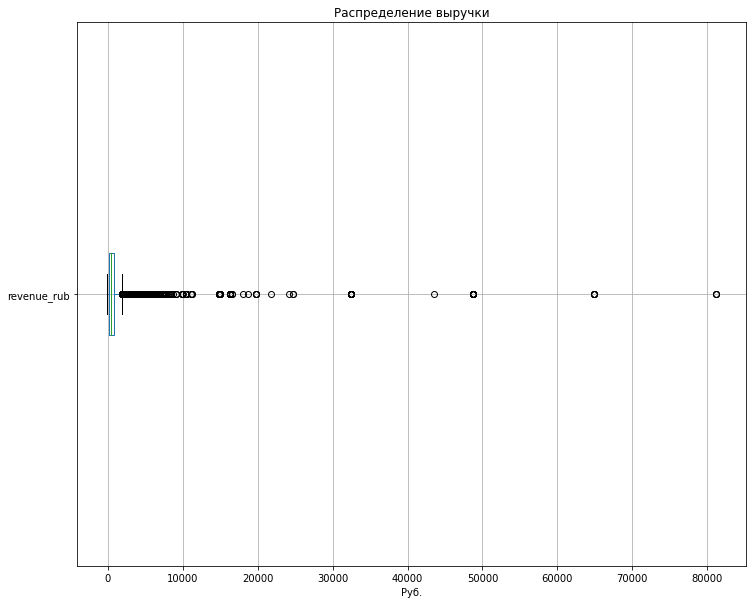

In [22]:
# Постороим диаграмму размаха
boxplot = df.boxplot(column='revenue_rub',
                    vert=False, 
                    figsize=(12, 10))
# Добавляем заголовок и метку оси X
boxplot.set_title('Распределение выручки')
boxplot.set_xlabel('Руб.');

Выбросов много, чтобы от них избавиться, отфильтруем значения по 99 процентилю

In [23]:
# Установим пороги
upper_line = df['revenue_rub'].quantile(0.99)

# Отфильтруем датасет от выбросов
new_df = df.loc[df['revenue_rub'] < upper_line]

In [24]:
# Проверка
new_df['revenue_rub'].describe()

count    287604.000000
mean        516.693737
std         509.364881
min         -90.760002
25%         111.675001
50%         343.619995
75%         787.710022
max        2627.000000
Name: revenue_rub, dtype: float64

Далее проверим данные на наличие явных и неявных дублей

In [25]:
# Ищем явные дубли
new_df.duplicated().sum() 

0

In [26]:
cols_list = new_df.columns.tolist()
cols_list = cols_list[1:]
cols_list

['user_id',
 'created_dt_msk',
 'created_ts_msk',
 'event_id',
 'cinema_circuit',
 'age_limit',
 'currency_code',
 'device_type_canonical',
 'revenue',
 'service_name',
 'tickets_count',
 'total',
 'days_since_prev',
 'event_name',
 'event_type_description',
 'event_type_main',
 'organizers',
 'region_name',
 'city_name',
 'city_id',
 'venue_id',
 'venue_name',
 'venue_address',
 'data',
 'nominal',
 'curs',
 'cdx',
 'revenue_rub']

In [27]:
# Ищем неявные дубли
new_df.duplicated(subset=cols_list).sum() 

30

Видим, что неявных дублей 30 (что не так много), удалим их для "очистки" датасета, тк это очевидно одинаковые покупки, айди заказы которых по каким-либо причинам различаются (скорее всего тех. ошибка, из-за чего заказы просто задублились в системе)

In [28]:
new_df = new_df.drop_duplicates(subset=cols_list)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287574 entries, 0 to 290610
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287574 non-null  int32         
 1   user_id                 287574 non-null  object        
 2   created_dt_msk          287574 non-null  datetime64[ns]
 3   created_ts_msk          287574 non-null  datetime64[ns]
 4   event_id                287574 non-null  int32         
 5   cinema_circuit          287574 non-null  object        
 6   age_limit               287574 non-null  int8          
 7   currency_code           287574 non-null  object        
 8   device_type_canonical   287574 non-null  object        
 9   revenue                 287574 non-null  float32       
 10  service_name            287574 non-null  object        
 11  tickets_count           287574 non-null  int8          
 12  total                   287574

Создадим несколько новых столбцов:
 + one_ticket_revenue_rub — выручка с продажи одного билета на мероприятие.
 + month — месяц оформления заказа в отдельный столбец.
 + season —  столбец с информацией о сезонности, включая такие категории, как: 'лето', 'осень', 'зима', 'весна'.

In [29]:
# Создадим несколько новых столбцов:
new_df['one_ticket_revenue_rub'] = new_df['revenue_rub'] / new_df['tickets_count']
new_df['month'] = new_df['created_dt_msk'].dt.month

def seasons(row):
    if row['month'] in [12, 1, 2]:
        return 'зима'
    elif row['month'] in [3, 4, 5]:
        return 'весна'
    elif row['month'] in [6, 7, 8]:
        return 'лето'
    else:
        return 'осень'

new_df['season'] = new_df.apply(seasons, axis=1)     

In [30]:
# Проверка
new_df.sample(7)

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season
218695,8541400,2aa353e47d0c080,2024-10-10,2024-10-10 21:41:58,210045,нет,18,rub,mobile,419.619995,...,"Дебютный проект ""Хороший"" Групп","бул. Бажова, д. 9/9",2024-10-10,100,19.930201,kzt,419.619995,104.904999,10,осень
279566,6450297,043f669c9f734b1,2024-06-23,2024-06-23 22:16:01,527249,нет,16,rub,mobile,1038.189941,...,"Музей исторических ремесел ""Задумка"" Лимитед","алл. Гоголя, д. 910 стр. 2/7",2024-06-23,100,19.138300,kzt,1038.189941,346.063314,6,лето
115814,5453828,d6f694b11202e62,2024-07-24,2024-07-24 09:59:05,540263,нет,18,rub,mobile,1900.500000,...,"Сообщество художников ""Секунда"" Инкорпорэйтед","пер. Астраханский, д. 23",2024-07-24,100,18.450600,kzt,1900.500000,475.125000,7,лето
290498,5986645,f7a0146fc193947,2024-06-14,2024-06-14 14:58:38,236435,нет,16,rub,desktop,513.479980,...,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785",2024-06-14,100,19.525000,kzt,513.479980,171.159993,6,лето
134198,3044566,8187dac4be757a0,2024-10-25,2024-10-25 11:07:26,486136,нет,12,rub,mobile,658.150024,...,"Центр искусства и культуры ""Попугай"" и партнеры","бул. Воровского, д. 917 к. 2",2024-10-25,100,19.878799,kzt,658.150024,329.075012,10,осень
214784,8549984,18e9aead0a393e7,2024-09-07,2024-09-07 16:26:21,439764,нет,16,rub,mobile,325.649994,...,"Академия искусств ""Angle"" Инк","ш. Химиков, д. 8",2024-09-07,100,18.599100,kzt,325.649994,108.549998,9,осень
164268,734426,8af3dc970d19ed7,2024-06-17,2024-06-17 16:25:01,533451,нет,12,rub,mobile,1700.050049,...,"Творческое объединение ""Компас"" Инк","бул. 40 лет Октября, д. 39 стр. 78",2024-06-17,100,19.731899,kzt,1700.050049,425.012512,6,лето


In [31]:
# Для удобства переименуем данные столбца month из чисел в строчные названия
month_dict={
      1: 'январь',
      2: 'февраль',
      3: 'март',
      4: 'апрель',
      5: 'май',
      6: 'июнь',
      7: 'июль',
      8: 'август',
      9: 'сентябрь',
      10: 'октябрь',
      11: 'ноябрь',
      12: 'декабрь'
}

new_df['month'] = new_df['month'].map(month_dict)
new_df

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.939941,...,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.697201,kzt,1521.939941,380.484985,август,лето
1,6274963,44c1c640a242aea,2024-08-20,2024-08-20 22:12:04,237325,нет,0,rub,mobile,144.729996,...,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-08-20,100,18.697201,kzt,144.729996,144.729996,август,лето
2,474528,2b1f730d7024681,2024-08-20,2024-08-20 15:29:56,373657,нет,18,rub,mobile,318.269989,...,"Музей истории ""Воспоминание"" Групп","наб. Тамбовская, д. 1/4 к. 577",2024-08-20,100,18.697201,kzt,318.269989,106.089996,август,лето
3,7477361,05ba93f1b1e1fdd,2024-08-20,2024-08-20 17:06:44,534657,нет,16,rub,mobile,339.609985,...,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50",2024-08-20,100,18.697201,kzt,339.609985,339.609985,август,лето
4,472150,3ee7dc2e115847f,2024-08-20,2024-08-20 02:57:22,534657,нет,16,rub,mobile,339.609985,...,"Школа фотографии ""Золотое"" Инк","ш. Микрорайон, д. 79 стр. 50",2024-08-20,100,18.697201,kzt,339.609985,339.609985,август,лето
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290606,236989,e75abeba6dd1fc4,2024-06-14,2024-06-14 18:21:55,10229,нет,12,rub,desktop,843.869995,...,"Спектакль ""Сентябрь"" Лтд","ул. Красноярская, д. 6/3 стр. 761",2024-06-14,100,19.525000,kzt,843.869995,168.773999,июнь,лето
290607,8365544,f29a8ec731fab1d,2024-06-14,2024-06-14 14:29:42,488578,нет,6,rub,mobile,230.750000,...,"Музей музыкальных инструментов ""Разноцвет"" и п...","пр. Коллективный, д. 5 к. 6/8",2024-06-14,100,19.525000,kzt,230.750000,46.150000,июнь,лето
290608,7032588,f7a0146fc193947,2024-06-14,2024-06-14 23:28:07,518322,нет,12,rub,mobile,749.530029,...,"Спектакль ""Ремесло"" Инк","алл. Степная, д. 5 стр. 9",2024-06-14,100,19.525000,kzt,749.530029,249.843343,июнь,лето
290609,6730350,fc950d43881de43,2024-06-14,2024-06-14 06:56:17,533051,нет,18,rub,mobile,162.130005,...,"Группа арт-менеджеров ""Салон"" Групп","бул. Гаражный, д. 332 стр. 3",2024-06-14,100,19.525000,kzt,162.130005,81.065002,июнь,лето


In [32]:
# Сохраним получившееся кол-во строк
final_row_count = new_df.shape[0]

print(f"Количество строк до предобработки: {initial_row_count}")
print(f"Количество строк после предобработки: {final_row_count}")

Количество строк до предобработки: 290611
Количество строк после предобработки: 287574


**Промежуточный вывод**

По окончании предобработки данных можно отметить следующее - в процессе все 3 датасета были объединены в один единый, который был нормализован, обработан от дубликатов и выбросов (итого удалено около 3000 строк (1% от датасета)). Кроме того, было добавлено 4 новых столбца, необходимых для более удобного анализа в дальнейшем (а именно: `revenue_rub` с выручкой, приведенной к рублям; `one_ticket_revenue_rub` с выручкой за 1 проданный билет; `month` с месяцем покупки и `season` с сезоном покупки)

## Исследовательский анализ данных (шаг 3)   

### Анализ распределения заказов по сегментам и их сезонные изменения   

Анализируйте динамику по таким разрезам:
+ тип мероприятия event_type_main;
+ тип устройства device_type_canonical;
+ категория мероприятий по возрастному рейтингу age_limit.

В этом разделе изучите распределение заказов по сегментам и их сезонные изменения, выполнив следующие шаги:
+ **Для каждого месяца найдите количество заказов** и визуализируйте результаты. Проверьте, фиксируется ли увеличение заказов от июня к ноябрю 2024 года. 
+ **Для осеннего и летнего периодов сравните распределение заказов** билетов по разным категориям: тип мероприятия, тип устройства, категория мероприятия по возрастному рейтингу. Результаты визуализируйте подходящим графиком, который поможет сопоставить значения для летнего и осеннего сезонов. Рекомендация: поскольку абсолютное количество заказов в разные сезоны может меняться, при сопоставлении результатов для каждого сегмента используйте доли. 
+ **Изучите изменение выручки с продажи одного билета** в зависимости от типа мероприятия летом и осенью. Видна ли динамика средней стоимости билета в разрезе разных категорий мероприятий? Для каждого типа мероприятия рассчитайте среднее значение выручки с одного билета, затем найдите относительное изменение осенних значений по сравнению с летними. Результат сопроводите подходящей визуализацией. 
+ **Сделайте вывод** о том, как меняется распределение заказов в каждой категории с наступлением осени. Было ли изменение средней стоимости одного билета в разрезе разных типов мероприятий?

In [33]:
# Для каждого месяца найдем количество заказов
new_df.groupby('month')['order_id'].count().sort_values()

month
июнь        33721
июль        40452
август      44573
сентябрь    69415
октябрь     99413
Name: order_id, dtype: int64

<AxesSubplot:title={'center':'Количество заказов по месяцам'}, xlabel='month', ylabel='Кол-во заказов'>

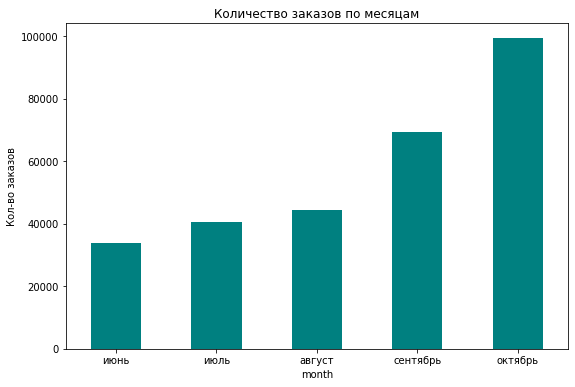

In [34]:
# Визуализируем
new_df.groupby('month')['order_id'].count().sort_values().plot(kind='bar',
                                                title='Количество заказов по месяцам',
                                                figsize=(9, 6),
                                                rot=0,
                                                color='teal',
                                                ylabel='Кол-во заказов')

Прослеживается тенденция увеличения заказов с каждым месяцем

In [35]:
# Сравним распределение заказов по типу мероприятий в разерезе сезонов
grouped_event = new_df.groupby(['season', 'event_type_main'], as_index=False)['order_id'].count()
season_sum = grouped_event.groupby('season')['order_id'].sum()
grouped_event['sum'] = grouped_event['season'].map(season_sum)

# Считаем долю 
grouped_event['share'] =round( grouped_event['order_id'] / grouped_event['sum'] , 3)

# Оставляем нужные столбцы
grouped_event = grouped_event[['season', 'event_type_main', 'share']]
grouped_event

,season,event_type_main,share
0,лето,выставки,0.020
1,лето,другое,0.273
2,лето,концерты,0.424
3,лето,спорт,0.025
4,лето,стендап,0.053
5,лето,театр,0.202
6,лето,ёлки,0.002
7,осень,выставки,0.014
8,осень,другое,0.197
9,осень,концерты,0.373


Text(0.5, 1.0, 'Доля заказов в разрезе мероприятий')

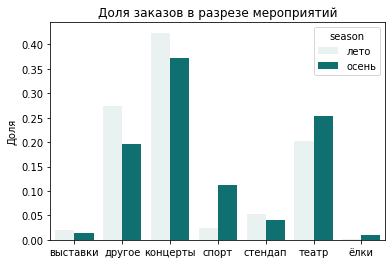

In [36]:
# Визуализируем
sns.barplot(x='event_type_main', 
            y='share',
            hue='season', 
            data=grouped_event, 
            color='teal')

plt.xlabel('')
plt.ylabel('Доля')
plt.title('Доля заказов в разрезе мероприятий')

Заказы по мероприятиям распределены неравномерно - с наступлением осени заказов по концертам, стендапам и другим категориям стало меньше.  Вероятнее всего, это связано с окончанием отпуска у многих, а также наступлением более холодного времени года (концерты и стендапы часто проводят на открытых территориях). А заказы связанные со споротом и театром стали увеличиваться - это можно связать с большим количесвтом спортивных игр осенью и более подходящей погодой для похода в театр (осенью ходить в театр вАйБоВеЕе)

In [37]:
# Сравним распределение заказов по возрасту в разерезе сезонов
grouped_age = new_df.groupby(['season', 'age_limit'], as_index=False)['order_id'].count()
age_sum = grouped_age.groupby('season')['order_id'].sum()
grouped_age['sum'] = grouped_age['season'].map(age_sum)

# Считаем долю 
grouped_age['share'] =round( grouped_age['order_id'] / grouped_age['sum'] , 3)

# Оставляем нужные столбцы
grouped_age = grouped_age[['season', 'age_limit', 'share']]
grouped_age

,season,age_limit,share
0,лето,0,0.180
1,лето,6,0.183
2,лето,12,0.202
3,лето,16,0.284
4,лето,18,0.150
5,осень,0,0.236
6,осень,6,0.177
7,осень,12,0.221
8,осень,16,0.262
9,осень,18,0.104


Text(0.5, 1.0, 'Доля заказов в разрезе возрастных ограничений')

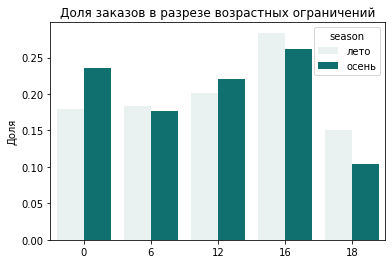

In [38]:
# Визуализируем
sns.barplot(x='age_limit', 
            y='share',
            hue='season', 
            data=grouped_age, 
            color='teal')

plt.xlabel('')
plt.ylabel('Доля')
plt.title('Доля заказов в разрезе возрастных ограничений')

Сильный различий между долями летних и осенних заказов нет, однако можно заметить, что
+ на мероприятия 0+ осенью заказы увеличились
+ на мероприятия 18+ и 16+ заказы упали

In [39]:
# Сравним распределение заказов по типу устройств в разерезе сезонов
grouped_device = new_df.groupby(['season', 'device_type_canonical'], as_index=False)['order_id'].count()
age_sum = grouped_device.groupby('season')['order_id'].sum()
grouped_device['sum'] = grouped_device['season'].map(age_sum)

# Считаем долю 
grouped_device['share'] =round( grouped_device['order_id'] / grouped_device['sum'] , 3)

# Оставляем нужные столбцы
grouped_device = grouped_device[['season', 'device_type_canonical', 'share']]
grouped_device

,season,device_type_canonical,share
0,лето,desktop,0.193
1,лето,mobile,0.807
2,осень,desktop,0.203
3,осень,mobile,0.797


Text(0.5, 1.0, 'Доля заказов в разрезе типов устройств')

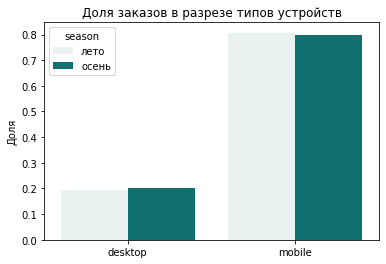

In [40]:
# Визуализируем
sns.barplot(x='device_type_canonical', 
            y='share',
            hue='season', 
            data=grouped_device, 
            color='teal')

plt.xlabel('')
plt.ylabel('Доля')
plt.title('Доля заказов в разрезе типов устройств')

Видим, что и летом и осенью доля заказов по устройствам распределена одинаково - заказы, оформленные через телефон сильно превышают вне зависимости от сезонности

In [41]:
# Сравним выручку с 1 заказа по типу мероприятий в разерезе сезонов
avg_revenue = new_df.groupby(['season', 'event_type_main'], as_index=False)['revenue_rub'].mean()
season_sum = avg_revenue.groupby('season')['revenue_rub'].sum()
avg_revenue['sum'] = avg_revenue['season'].map(season_sum)

# Считаем долю 
avg_revenue['share'] =round( avg_revenue['revenue_rub'] / avg_revenue['sum'] , 3)

# Оставляем нужные столбцы
avg_revenue = avg_revenue[['season', 'event_type_main', 'revenue_rub', 'share']]
avg_revenue

,season,event_type_main,revenue_rub,share
0,лето,выставки,228.381672,0.067
1,лето,другое,229.084741,0.067
2,лето,концерты,782.495463,0.228
3,лето,спорт,147.248160,0.043
4,лето,стендап,646.888938,0.189
5,лето,театр,586.029010,0.171
6,лето,ёлки,806.906376,0.235
7,осень,выставки,235.990865,0.073
8,осень,другое,225.595369,0.070
9,осень,концерты,711.972726,0.221


Text(0.5, 1.0, 'Сравнение средней выручки с 1 билета в разерезе сезонов')

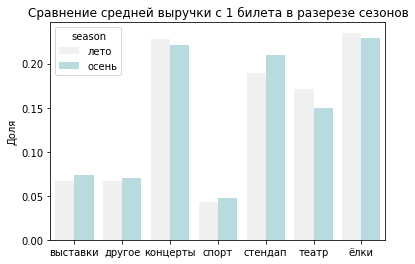

In [42]:
# Визуализируем
sns.barplot(x='event_type_main', 
            y='share',
            hue='season', 
            data=avg_revenue, 
            color='powderblue')

plt.xlabel('')
plt.ylabel('Доля')
plt.title('Сравнение средней выручки с 1 билета в разерезе сезонов')

In [43]:
# Чтобы найти относительное изменение осенний значений с летними, создадим сводную
pivot_df = avg_revenue.pivot_table(index='event_type_main', columns='season', values='share')
pivot_df.reset_index()

season,event_type_main,лето,осень
0,выставки,0.067,0.073
1,другое,0.067,0.070
2,концерты,0.228,0.221
3,спорт,0.043,0.047
4,стендап,0.189,0.210
5,театр,0.171,0.150
6,ёлки,0.235,0.229


In [44]:
# Далее вычтем из столбца "осень" столбец "лето" и умножим на 100%
pivot_df['разница'] = (pivot_df['осень'] - pivot_df['лето'] ) * 100
pivot_df

season,лето,осень,разница
event_type_main,,,
выставки,0.067,0.073,0.6
другое,0.067,0.070,0.3
концерты,0.228,0.221,-0.7
спорт,0.043,0.047,0.4
стендап,0.189,0.210,2.1
театр,0.171,0.150,-2.1
ёлки,0.235,0.229,-0.6


Итого получили гистограмму со средней выручкой за 1 заказ в разрезе мероприятий и сезонов, и таблицу, которая содержит инфо об отнсоительной разнице между средней выручкой заказа по сезонам. Можно заметить, что все изменения в разрезе сезонов незначительные - менее 1%, кроме стендапов и театров, где разница около 2%, т.е. с натусплением осени в других сферах ничего кардинально не менялось. А вот средняя выручка в разере мероприятий различается - больше всего средний чек выручки с заказа у елок, концертов и стендапов, причем в оба сезона. Значит в дальнейшем можно акцентировать внимание и увеличивать кол-во продаж билетов именно эти категории, тк они наиболее "прибылеприносящие"

###  Осенняя активность пользователей  

Изучите активность пользователей осенью 2024 года. В вашем распоряжении данные за два осенних месяца. Используйте только эти данные и сделайте следующее:
+ Проанализируйте динамику изменений по дням для: 
    + общего числа заказов; 
    + количества активных пользователей DAU; 
    + среднего числа заказов на одного пользователя; 
    + средней стоимости одного билета. 
    
    Рекомендация: удобно создать одну сводную таблицу, и в ней по дням рассчитать число заказов и число уникальных пользователей, а затем найти величину — количество заказов на одного пользователя. Полученные результаты можно визуализировать с помощью линейного графика. Подобные графики вы строили на дашборде, только делали это с агрегацией по неделям. 


+ Изучите недельную цикличность. Выделите день недели и сравните пользовательскую активность в будни и выходные. 
+ Напишите промежуточный вывод о пользовательской активности и недельной цикличности. 

In [45]:
new_df.sample(5)

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season
271018,6787741,97f53f0d45817d6,2024-07-06,2024-07-06 14:33:17,525084,нет,0,rub,mobile,26.340000,...,"Команда артистов ""Ведро"" Групп","ул. Льва Толстого, д. 76 к. 331",2024-07-06,100,18.539499,kzt,26.340000,13.170000,июль,лето
174070,2325163,e617bb564c5812e,2024-06-26,2024-06-26 00:03:21,460567,нет,6,rub,mobile,872.489990,...,"Клуб хорового пения ""Гардероб"" и партнеры","ул. Пионерская, д. 86 стр. 936",2024-06-26,100,18.757999,kzt,872.489990,436.244995,июнь,лето
259359,8530960,60d09a82e783d09,2024-09-06,2024-09-06 20:20:31,535735,нет,6,rub,mobile,964.640015,...,"Группа арт-менеджеров ""Таблетка"" Инкорпорэйтед","наб. Шевченко, д. 867 стр. 2",2024-09-06,100,18.550400,kzt,964.640015,321.546672,сентябрь,осень
207357,2056536,b52e1b054c35a9d,2024-10-01,2024-10-01 12:39:38,438335,нет,12,rub,mobile,1803.140015,...,"Киновидеостудия ""Angle"" Лтд","пер. Деповский, д. 120",2024-10-01,100,19.452499,kzt,1803.140015,601.046672,октябрь,осень
29446,2867956,02ea4583333f064,2024-07-09,2024-07-09 15:41:26,445818,нет,18,rub,mobile,1217.810059,...,"Школа театрального мастерства ""Магнит"" и партнеры","наб. Малая, д. 392 стр. 37",2024-07-09,100,18.512400,kzt,1217.810059,608.905029,июль,лето


In [46]:
# Cоздадим новый датасет 
autumn_df = new_df[new_df['season']=='осень'].copy()
autumn_df

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season
8058,4222372,0beb8fc0c0a9ce1,2024-10-21,2024-10-21 14:14:26,169230,нет,16,rub,mobile,1521.939941,...,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-10-21,100,19.788401,kzt,1521.939941,380.484985,октябрь,осень
8059,3188290,fc950d43881de43,2024-10-21,2024-10-21 21:42:42,169230,нет,16,rub,mobile,1141.449951,...,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-10-21,100,19.788401,kzt,1141.449951,380.483317,октябрь,осень
8060,2217370,b11294e5f3e6da6,2024-10-21,2024-10-21 14:05:34,237325,нет,0,rub,mobile,289.450012,...,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-10-21,100,19.788401,kzt,289.450012,144.725006,октябрь,осень
8061,7926136,b5ecbee7c8fe379,2024-10-21,2024-10-21 21:36:31,237325,нет,0,rub,mobile,434.179993,...,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-10-21,100,19.788401,kzt,434.179993,144.726664,октябрь,осень
8062,7453001,c87b8d1ab30ce07,2024-10-21,2024-10-21 10:19:19,578454,нет,0,rub,mobile,1258.569946,...,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-21,100,19.788401,kzt,1258.569946,314.642487,октябрь,осень
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269633,8200389,efd7b595af23463,2024-09-18,2024-09-18 06:58:53,560184,нет,16,rub,mobile,224.740005,...,"Заповедник ""Ода"" и партнеры","ул. Ленская, д. 1/6 к. 2",2024-09-18,100,19.023600,kzt,224.740005,112.370003,сентябрь,осень
269634,5309379,f5f605cc1c89b39,2024-09-18,2024-09-18 13:03:00,563889,нет,6,rub,mobile,76.300003,...,"Искусственная сцена ""Краски"" и партнеры","пер. Р.Люксембург, д. 499 к. 997",2024-09-18,100,19.023600,kzt,76.300003,15.260001,сентябрь,осень
269635,4601750,fc950d43881de43,2024-09-18,2024-09-18 18:02:43,213019,нет,18,rub,mobile,1372.579956,...,"Школа музыкального театра ""Труд"" Групп","пер. Городской, д. 8/6 к. 8/3",2024-09-18,100,19.023600,kzt,1372.579956,457.526652,сентябрь,осень
269636,5523892,fce8b5e7ceaf416,2024-09-18,2024-09-18 21:00:12,543039,нет,12,rub,mobile,124.800003,...,"Кабинет Искусств ""Восход"" Групп","алл. Поперечная, д. 6",2024-09-18,100,19.023600,kzt,124.800003,41.600001,сентябрь,осень


In [47]:
# Cоздадим сводную таблицу
pivot_autumn = pd.pivot_table(autumn_df,
                              index='created_dt_msk',
                              values=['order_id', 'user_id', 'revenue_rub'],
                              aggfunc={'order_id':'count', # общее число заказов
                              'user_id': 'nunique', # DAU
                              'revenue_rub': 'mean'}) # ср выручка с 1 билета

pivot_autumn = pivot_autumn.reset_index()
# Добавим столбец со средним кол-вом заказов на пользователя
pivot_autumn['orders_per_user'] = round( pivot_autumn['order_id'] / pivot_autumn['user_id'] , 2)
pivot_autumn

,created_dt_msk,order_id,revenue_rub,user_id,orders_per_user
0,2024-09-01,1331,553.404260,565,2.36
1,2024-09-02,1380,509.810411,574,2.40
2,2024-09-03,5114,226.617394,778,6.57
3,2024-09-04,1774,486.052003,686,2.59
4,2024-09-05,1945,510.029725,740,2.63
...,...,...,...,...,...
56,2024-10-27,2854,516.429324,1036,2.75
57,2024-10-28,2841,479.990760,985,2.88
58,2024-10-29,2842,479.686667,999,2.84
59,2024-10-30,2930,500.916296,1040,2.82


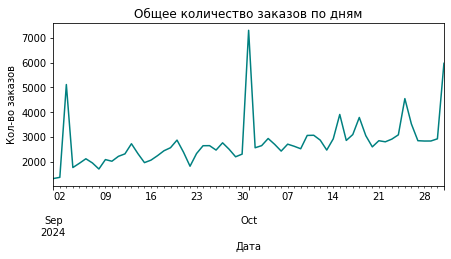

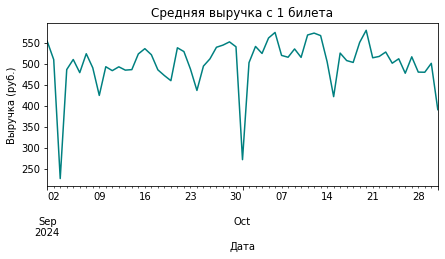

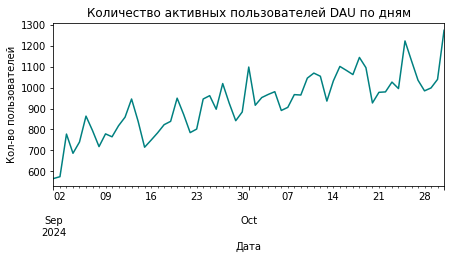

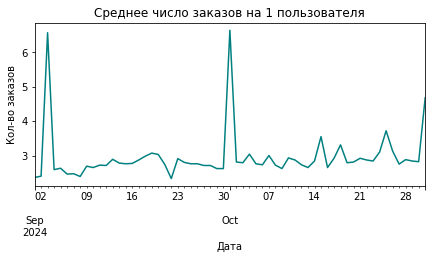

In [48]:
# Строим линейные графики
# я честно пыталась через цикл, но у меня что-то не вышло, в итоге быстрее получилось скопипастить:) 

pivot_autumn.plot(kind='line', x='created_dt_msk', y='order_id', figsize=(7, 3), legend=False, color='teal',
                 ylabel='Кол-во заказов')   
plt.title('Общее количество заказов по дням')
plt.xlabel('Дата')
plt.show()

pivot_autumn.plot(kind='line', x='created_dt_msk', y='revenue_rub', figsize=(7, 3), legend=False, color='teal',
                  ylabel='Выручка (руб.)')  
plt.title('Средняя выручка с 1 билета')
plt.xlabel('Дата')
plt.show()

pivot_autumn.plot(kind='line', x='created_dt_msk', y='user_id', figsize=(7, 3), legend=False, color='teal',
                 ylabel='Кол-во пользователей') 
plt.title('Количество активных пользователей DAU по дням')
plt.xlabel('Дата')
plt.show()

pivot_autumn.plot(kind='line', x='created_dt_msk', y='orders_per_user', figsize=(7, 3), legend=False, color='teal',
                  ylabel='Кол-во заказов') 
plt.title('Среднее число заказов на 1 пользователя')
plt.xlabel('Дата')
plt.show()

**Анализ графиков по дням**

1) **Общее кол-во заказов по дням** - в конце/начале месяца люди сильно больше всего совершают заказы, в середине же месяца показатель не сильно колеблется

2) **Средняя выручка с 1 билета** - в конце/начале видим, что выручка сильно падает, скорее всего это связано с проведением различных акций/скидок, из-за и чего кол-ва заказов увеличивается, а выручка падает

3) **Количество активных пользователей DAU по дням** -  наблюдается тенденция к увеличению DAU

4) **Среднее число заказов на 1 пользователя** - в течение месяца показатель можно назвать стабильным, но к концу/началу месяца график линия резко растет, это также является следствием акций/скидок

In [49]:
# Создадим новый датасет по дням недели
autumn_df['weekday'] = autumn_df['created_dt_msk'].dt.weekday 

def week(weekday):  
    if weekday == 0:
        return 'Понедельник'
    elif weekday == 1:  
        return 'Вторник'
    elif weekday == 2:
        return 'Среда'
    elif weekday == 3:
        return 'Четверг'
    elif weekday == 4:
        return 'Пятница'
    elif weekday == 5:
        return 'Суббота'
    else:
        return 'Воскресенье'

autumn_df['weekday_name'] = autumn_df['weekday'].apply(week) 
autumn_df.sample(7)

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,data,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season,weekday,weekday_name
151409,2048880,b1d1cba963a4038,2024-09-20,2024-09-20 14:32:49,552016,нет,18,rub,mobile,2457.550049,...,2024-09-20,100,19.353600,kzt,2457.550049,614.387512,сентябрь,осень,4,Пятница
258578,360587,85929277659c29f,2024-09-06,2024-09-06 12:15:54,446922,нет,6,rub,mobile,905.640015,...,2024-09-06,100,18.550400,kzt,905.640015,181.128003,сентябрь,осень,4,Пятница
124304,2545041,a2178ce9bb4d911,2024-10-06,2024-10-06 13:13:47,422166,нет,0,rub,mobile,194.839996,...,2024-10-06,100,19.647499,kzt,194.839996,48.709999,октябрь,осень,6,Воскресенье
233197,7397263,c9b8c86a0f6dc8d,2024-09-05,2024-09-05 19:12:55,286882,нет,18,rub,mobile,438.429993,...,2024-09-05,100,18.421700,kzt,438.429993,219.214996,сентябрь,осень,3,Четверг
197992,7198961,1ecc9e34a3159f8,2024-09-22,2024-09-22 16:51:45,554908,КиноСити,18,rub,mobile,344.299988,...,2024-09-22,100,19.331600,kzt,344.299988,114.766663,сентябрь,осень,6,Воскресенье
219129,2820338,29c39fbf31d948d,2024-10-10,2024-10-10 15:23:26,422827,нет,12,rub,mobile,530.320007,...,2024-10-10,100,19.930201,kzt,530.320007,265.160004,октябрь,осень,3,Четверг
229956,4322103,c7d4d0d8a2f0135,2024-09-12,2024-09-12 09:58:33,563318,нет,6,rub,mobile,27.030001,...,2024-09-12,100,19.115200,kzt,27.030001,27.030001,сентябрь,осень,3,Четверг


In [50]:
# Cгруппируем по дням недели
autumn_df_grouped = autumn_df.groupby('weekday_name').agg({'order_id':'count', 
                                                      'user_id': 'nunique', 
                                                      'revenue_rub': 'mean'})
autumn_df_grouped = autumn_df_grouped.reset_index()

# тут я с помощью ИИ поправила порядок дней недели, если есть способ полегче - будет супер, потому что этот я не поняла)
ordered_days = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
autumn_df_grouped['weekday_name'] = pd.Categorical(autumn_df_grouped['weekday_name'], categories=ordered_days, ordered=True)
autumn_df_grouped = autumn_df_grouped.sort_values('weekday_name')

autumn_df_grouped

,weekday_name,order_id,user_id,revenue_rub
2,Понедельник,21535,4450,502.046489
1,Вторник,31533,4799,389.811782
4,Среда,22917,4818,506.072375
6,Четверг,27197,4974,481.189278
3,Пятница,24859,4872,510.130888
5,Суббота,21362,4574,531.174766
0,Воскресенье,19425,4399,544.725997


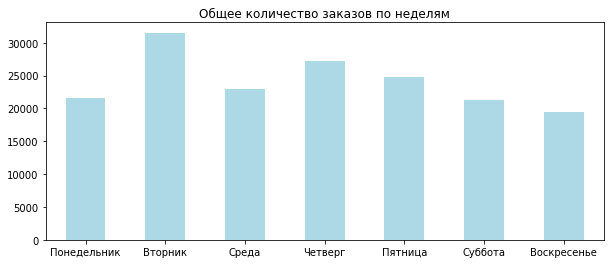

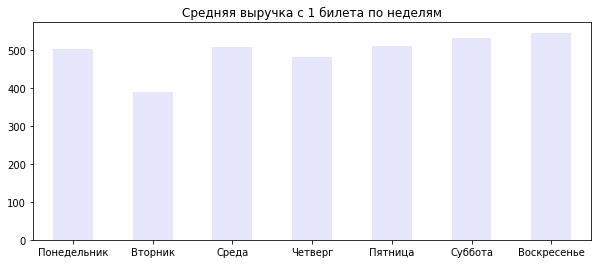

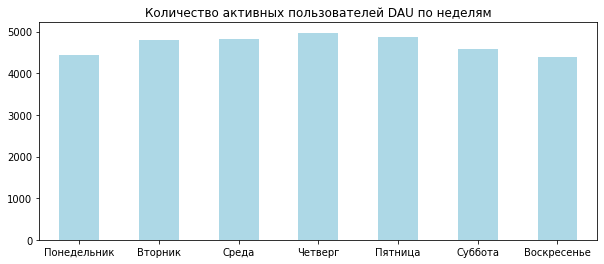

In [51]:
# Строим линейные графики

autumn_df_grouped.plot(kind='bar', x='weekday_name', y='order_id', figsize=(10, 4), legend=False, color='lightblue', rot=0)   
plt.title('Общее количество заказов по неделям')
plt.xlabel('')
plt.show()

autumn_df_grouped.plot(kind='bar', x='weekday_name', y='revenue_rub', figsize=(10, 4), legend=False, color='lavender', rot=0) 
plt.title('Средняя выручка с 1 билета по неделям')
plt.xlabel('')
plt.show()

autumn_df_grouped.plot(kind='bar', x='weekday_name', y='user_id', figsize=(10, 4), legend=False, color='lightblue', rot=0)
plt.title('Количество активных пользователей DAU по неделям')
plt.xlabel('')
plt.show()

**Анализ графиков по неделям**

1) **Общее кол-во заказов** - в выходные дни количество заказов не сильно меньше будних заказов, однако во вторник виден пик активности по заказам, это может говорить о проведении акций именно по вторникам

2) **Средняя выручка с 1 билета** - в течение всей недели средняя выручка примерно одинаковая (в будние дни видим даже чуть большую выручка при меньшем кол-ве заказов - это хороший показатель). Во втоник видно снижение выручки с заказа, что также подветрждает догадку о проведении акций/скидок

3) **Количество активных пользователей DAU по дням** -  количество DAU примерно одинаковое на протяжении всей недели, с небольшим перевесом в середине недели.

### Популярные события и партнёры

+ Для каждого региона посчитайте уникальное количество мероприятий и общее число заказов. В каких регионах предлагается наибольшее разнообразие мероприятий?
+ Для каждого билетного партнёра посчитайте общее число уникальных мероприятий, обработанных заказов и суммарную выручку с заказов билетов. Сделайте акцент на наиболее активных партнёрах.

Рекомендация: исследуйте не только абсолютные значения, но и доли. Например, для каждого региона посчитайте долю проводимых мероприятий от их общего числа или долю заказов в регионе от общего числа заказов.

В конце напишите промежуточный вывод, проанализируйте не только топ-категории, но и общее распределение данных между категориями. Существуют ли явные лидеры среди регионов и партнёров?

In [52]:
# Создадим новый датасет и сгруппируем по региону
region_df = new_df.groupby('region_name').agg({'event_id':'nunique',
                                               'order_id':'count'})
region_df = region_df.reset_index()
region_df['events_share'] = round( region_df['event_id'] / region_df['event_id'].sum(),5)
region_df['orders_share'] = round( region_df['order_id'] / region_df['order_id'].sum(),5)
region_df = region_df.sort_values(by=['events_share', 'orders_share'], ascending=[False, False])
region_df

,region_name,event_id,order_id,events_share,orders_share
23,Каменевский регион,5940,89749,0.26561,0.31209
60,Североярская область,3800,43752,0.16992,0.15214
77,Широковская область,1232,16172,0.05509,0.05624
57,Светополянский округ,1075,7502,0.04807,0.02609
52,Речиновская область,702,6268,0.03139,0.02180
...,...,...,...,...,...
56,Светолесский край,2,24,0.00009,0.00008
33,Лесноярский край,2,19,0.00009,0.00007
5,Верхозёрский край,2,11,0.00009,0.00004
66,Сосноводолинская область,2,10,0.00009,0.00003


In [53]:
# Отберем топ-10 регионов
region_df = region_df[:10]
region_df

,region_name,event_id,order_id,events_share,orders_share
23,Каменевский регион,5940,89749,0.26561,0.31209
60,Североярская область,3800,43752,0.16992,0.15214
77,Широковская область,1232,16172,0.05509,0.05624
57,Светополянский округ,1075,7502,0.04807,0.02609
52,Речиновская область,702,6268,0.03139,0.02180
74,Травяная область,683,5036,0.03054,0.01751
11,Горицветская область,551,5154,0.02464,0.01792
61,Серебринская область,541,5591,0.02419,0.01944
78,Яблоневская область,535,6123,0.02392,0.02129
69,Тепляковская область,528,4385,0.02361,0.01525


In [54]:
# Создадим новый датасет и сгруппируем по партнерам
partners_df = new_df.groupby('service_name').agg({'event_id':'nunique',
                                               'order_id':'count',
                                               'revenue_rub':'sum'})
partners_df = partners_df.reset_index()
partners_df['events_share'] = round( partners_df['event_id'] / partners_df['event_id'].sum(),5)
partners_df['orders_share'] = round( partners_df['order_id'] / partners_df['order_id'].sum(),5)
partners_df['revenue_share'] = round( partners_df['revenue_rub'] / partners_df['revenue_rub'].sum(),5)
partners_df['revenue_rub'] = round( partners_df['revenue_rub'] , 2)
partners_df = partners_df.sort_values(by=['events_share', 'orders_share', 'revenue_share'], ascending=[False, False, False])
partners_df

,service_name,event_id,order_id,revenue_rub,events_share,orders_share,revenue_share
21,Лови билет!,4870,40823,16729886.46,0.19967,0.14196,0.11259
3,Билеты без проблем,4248,63064,24856575.70,0.17417,0.21930,0.16728
5,Билеты в руки,3530,40284,13202172.26,0.14473,0.14008,0.08885
25,Облачко,2335,26410,18609295.32,0.09574,0.09184,0.12524
22,Лучшие билеты,1762,17741,2724060.58,0.07224,0.06169,0.01833
24,Мой билет,1300,33957,20583733.43,0.05330,0.11808,0.13852
30,Тебе билет!,1062,5200,2988324.62,0.04354,0.01808,0.02011
26,Прачечная,1026,10222,4746810.51,0.04207,0.03555,0.03195
8,Весь в билетах,856,16438,16566881.16,0.03510,0.05716,0.11149
35,Яблоко,714,5005,3870922.60,0.02927,0.01740,0.02605


In [55]:
# Отберем топ-10 партнеров
partners_df = partners_df[:10]
partners_df

,service_name,event_id,order_id,revenue_rub,events_share,orders_share,revenue_share
21,Лови билет!,4870,40823,16729886.46,0.19967,0.14196,0.11259
3,Билеты без проблем,4248,63064,24856575.70,0.17417,0.21930,0.16728
5,Билеты в руки,3530,40284,13202172.26,0.14473,0.14008,0.08885
25,Облачко,2335,26410,18609295.32,0.09574,0.09184,0.12524
22,Лучшие билеты,1762,17741,2724060.58,0.07224,0.06169,0.01833
24,Мой билет,1300,33957,20583733.43,0.05330,0.11808,0.13852
30,Тебе билет!,1062,5200,2988324.62,0.04354,0.01808,0.02011
26,Прачечная,1026,10222,4746810.51,0.04207,0.03555,0.03195
8,Весь в билетах,856,16438,16566881.16,0.03510,0.05716,0.11149
35,Яблоко,714,5005,3870922.60,0.02927,0.01740,0.02605


Итого мы имеем 2 датасета (специально не визуализировала их, тк в данном случае мне кажется более уместно посмотреть на таблицы и все будет наглядно и понятно, нежели создавать графики для каждого столбца). 

Анализируя таблицу `region_df`, видим:
+ Каменевский регион и Североярская область занимают топ и по доле заказов, и по доле мероприятий, причем оба региона сильно перевешивают по показателям, это явные лидеры, а доля остальных регионов уже менее 6%, это говорит о неравномером распределении заказов по регионам, что ожидаемо, тк это скорее всего крупные мегаполисы, в других же регионах и кол-во проводимых мероприятий, вероятно, меньше, и доход населения меньше. 

Анализируя таблицу `partners_df`, видим:
+ Партнеры Лови билет!, Билеты без проблем также являются лидерами, тк доли заказов, мероприятий и выручки сосредоточены именно на них. Аналогично с регионами, видим, что распределение по всем партнерам неравномерное - у большинства партнеров менее 1% по каждому показателю, это может послужить сигналом для улучшения продаж по данным сервисам

## Статистический анализ данных (шаг 4)

Проверьте две гипотезы, которые предполагают большую активность пользователей мобильных устройств:
+ Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
+ Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

Перед проведением гипотез изучите сравниваемые данные, обоснуйте выбор статистического теста, укажите формулировку нулевой и альтернативной гипотез. Результаты тестов прокомментируйте в промежуточном выводе. Используйте данные только за осенний период.

**ЧАСТЬ 1**

Для начала сформулируем гипотезы:
+ **Нулевая:** Среднее кол-во заказов на одного пользователя мобильного приложения не больше среднего кол-ва заказов на пользователя стационарного устройства.     
+ **Альтернативная:** Среднее кол-во заказов на одного пользователя мобильного приложения больше среднего кол-ва заказов на пользователя стационарного устройства. 

In [56]:
# Cгруппируем данные по типу устройства
user_orders = autumn_df.groupby(['user_id', 'device_type_canonical'])['order_id'].nunique().reset_index()
mobile_orders = user_orders[user_orders['device_type_canonical'] == 'mobile']['order_id'].reset_index()
desktop_orders = user_orders[user_orders['device_type_canonical'] == 'desktop']['order_id'].reset_index()
user_orders

,user_id,device_type_canonical,order_id
0,0005ca5e93f2cf4,mobile,1
1,000898990054619,mobile,2
2,000a55a418c128c,mobile,2
3,001e7037d013f0f,mobile,2
4,00245c702bc343e,mobile,2
...,...,...,...
19066,fff32fc9ad0f9f6,desktop,1
19067,fffcd3dde79eb2c,desktop,2
19068,fffcd3dde79eb2c,mobile,14
19069,fffeeb3c120cf0b,desktop,1


In [57]:
avg_orders_per_mob_user = mobile_orders['order_id'].mean()
avg_orders_per_dp_user = desktop_orders['order_id'].mean()
print(f'Среднее кол-во заказов на пользователя мобильной версии: {avg_orders_per_mob_user}')
print(f'Среднее кол-во заказов на пользователя десктопной версии: {avg_orders_per_dp_user}')

Среднее кол-во заказов на пользователя мобильной версии: 9.471193125792364
Среднее кол-во заказов на пользователя десктопной версии: 7.050277036733019


Видим, что у пользователя мобилиной версии показатель выше, но, чтобы понять, насколько это статзначимо, нужно провести тест.

In [58]:
# Сначала проверим распределение заказов
mobile_orders['order_id'].describe()

count    14198.000000
mean         9.471193
std         68.095629
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       4335.000000
Name: order_id, dtype: float64

In [59]:
desktop_orders['order_id'].describe()

count    4873.000000
mean        7.050277
std        36.029826
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max      1504.000000
Name: order_id, dtype: float64

Видим, что есть выбросы в большую сторону, поэтому можно поступить 2 способами:
+ обработать данные, очистив от выбросов, и использовать **классический t-тест**
+ оставить выбросы и использовать **тест Манна — Уитни**.

In [60]:
# Выборка целевой метрики для группы A
metric_a = mobile_orders['order_id']
# Выборка целевой метрики для группы B
metric_b = desktop_orders['order_id']

# На каком уровне значимости проверяем гипотезу о равенстве распределений
alpha = 0.05 

# Применяем тест Манна — Уитни
stat_mw, p_value_mw = mannwhitneyu(
    metric_a, 
    metric_b, 
    alternative='greater' # односторонняя альтернативаня гипотеща
) 

if p_value_mw > alpha:
    print(f'pvalue={p_value_mw} > {alpha}')
    print('Нулевая гипотеза находит подтверждение!')
else:
    print(f'pvalue={p_value_mw} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения!\nСреднее кол-во заказов у пользователей мобильной версии выше, чем у пользователей десктопной версии')

pvalue=3.2816388922348474e-07 < 0.05
Нулевая гипотеза не находит подтверждения!
Среднее кол-во заказов у пользователей мобильной версии выше, чем у пользователей десктопной версии


**Итак, мы опровергаем нулевую гипотезу, а значит среднее кол-во заказов у пользователей мобильной версии действительно выше, чем у пользователей десктопной версии**

**ЧАСТЬ 2**

Также сформулируем гипотезы:
+ **Нулевая:** Среднее время между заказами пользователя мобильного приложения не выше по сравнению с пользователями стационарных устройств
+ **Альтернативная:** Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств

In [61]:
# Cгруппируем данные
days_since_prev = autumn_df.groupby(['user_id', 'device_type_canonical'])['days_since_prev'].mean().reset_index()
days_since_prev_mob = days_since_prev[days_since_prev['device_type_canonical'] == 'mobile']['days_since_prev'].reset_index()
days_since_prev_dp = days_since_prev[days_since_prev['device_type_canonical'] == 'desktop']['days_since_prev'].reset_index()
days_since_prev

,user_id,device_type_canonical,days_since_prev
0,0005ca5e93f2cf4,mobile,75.0
1,000898990054619,mobile,51.0
2,000a55a418c128c,mobile,16.0
3,001e7037d013f0f,mobile,43.5
4,00245c702bc343e,mobile,27.5
...,...,...,...
19066,fff32fc9ad0f9f6,desktop,74.0
19067,fffcd3dde79eb2c,desktop,2.5
19068,fffcd3dde79eb2c,mobile,4.0
19069,fffeeb3c120cf0b,desktop,NaN


In [62]:
# Удалим пользователей, у который пропуск в столбце days_since_prev
# тк у них не было повторных покупок, а значит они не подходят под наш тест
days_since_prev_mob = days_since_prev_mob.dropna(subset=['days_since_prev']) 
days_since_prev_dp = days_since_prev_dp.dropna(subset=['days_since_prev']) 

In [63]:
avg_days_since_prev_mob = days_since_prev_mob['days_since_prev'].mean()
avg_days_since_prev_dp = days_since_prev_dp['days_since_prev'].mean()
print(f'Среднее время между заказами пользователя мобильной версии: {avg_days_since_prev_mob}')
print(f'Среднее время между заказами пользователядесктопной версии: {avg_days_since_prev_dp}')

Среднее время между заказами пользователя мобильной версии: 20.632524490356445
Среднее время между заказами пользователядесктопной версии: 14.87830924987793


Видим, что у пользователя мобилиной версии выше, но, чтобы понять, насколько это статзначимо, нужно провести тест

In [64]:
# Сначала проверим распределение времени
days_since_prev_mob['days_since_prev'].describe()

count    10198.000000
mean        20.632524
std         27.370680
min          0.000000
25%          2.052632
50%          9.500000
75%         28.000000
max        148.000000
Name: days_since_prev, dtype: float64

In [65]:
days_since_prev_dp['days_since_prev'].describe()

count    4035.000000
mean       14.878309
std        24.218756
min         0.000000
25%         1.000000
50%         4.500000
75%        17.000000
max       146.000000
Name: days_since_prev, dtype: float64

Аналогично, видим, что есть выбросы в большую сторону, поэтому будем использовать **тест Манна — Уитни**

In [66]:
# Выборка целевой метрики для группы A
a = days_since_prev_mob['days_since_prev']
# Выборка целевой метрики для группы B
b = days_since_prev_dp['days_since_prev']

# На каком уровне значимости проверяем гипотезу о равенстве распределений
alpha = 0.05 

# Применяем тест Манна — Уитни
stat_mw, p_value_mw = mannwhitneyu(
    a, 
    b, 
    alternative='greater' # односторонняя альтернативаня гипотеща
) 

if p_value_mw > alpha:
    print(f'pvalue={p_value_mw} > {alpha}')
    print('Нулевая гипотеза находит подтверждение!')
else:
    print(f'pvalue={p_value_mw} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения!\nСреднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств')

pvalue=2.7000892229018948e-52 < 0.05
Нулевая гипотеза не находит подтверждения!
Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств


**Мы также опровергаем нулевую гипотезу, а значит среднее время между заказами пользователей мобильных приложений действительно выше по сравнению с пользователями стационарных устройств**

## Общий вывод и рекомендации (шаг 5)

В конце проекта напишите общий вывод и рекомендации — на что обратить внимание. В выводах коротко укажите:
+ Информацию о данных, с которыми вы работали. 
+ Основные результаты анализа: какие мероприятия наиболее востребованы, как изменилась популярность мероприятий осенью, как изменилась стоимость среднего чека. Какую информацию можно получить после изучения пользовательской активности? Существуют ли среди регионов и партнёров явные лидеры по числу заказов и выручке с продажи билетов? Дополните вывод другой информацией, которая покажется вам важной и интересной. Следите за общим объёмом выводов — они должны быть компактными и ёмкими.
+ Прокомментируйте результаты проверки гипотез. 

В конце предложите рекомендации, на что стоит обратить внимание в первую очередь.

**Итак, по результатам проделанной работы можно сделать следующие выводы:**
+ 3 доступных датасета были объединены в 1 единый, который был нормализован, обработан от дубликатов и выбросов. А также, было добавлено 4 новых столбца, необходимых для более удобного анализа в дальнейшем
+ Наиболее востребованные мероприятия - концерты и театрты, причем вне зависимости от сезона
+ Средняя выручка с продажи 1 билета с наступлением осени также значительно не изменилась
+ наибольшую выручку приносят билеты на елки, концерты и стендапы (вне зависимости от сезона)
+ Видна тенденция увеличения заказов с каждым месяцем
+ Каменевский регион и Североярская область занимают топ и по доле заказов, и по доле мероприятий, причем оба региона сильно перевешивают по показателям
+ Партнеры "Лови билет!", "Билеты без проблем" также являются лидерами, тк бОльшие доли заказов, мероприятий и выручки сосредоточены именно на них
+ В начале/конце месяца проводятся различные акции/скидки, вследствие чего кол-во заказов увеличивается, а выручка падает
+ Наблюдается тенденция к увеличению DAU
+ В выходные дни количество заказов незначительно меньше по сравнению с будними днями
+ По вторникам наблюдается пик активности по заказам и одновременное снижение выручки, это также может говорить о проведении акций именно по вторникам
+ Большинство пользователей заказывают билеты с телефона, а не со стационарных устройсвт
+ Среднее кол-во заказов у пользователей мобильной версии выше, чем у пользователей десктопной версии. Если сранивать среднее время между заказами - у пользователей мобильных приложений оно также больше по сравнению с пользователями десктопа.

**Рекомендации:**
+ Тщательное планирование акций (особенно по вторникам и в начале/конце месяца) - сильное снижение выручки указывает на неэффективные скидки, несмотря на увеличение кол-ва заказов. Более детальное планирование акций может помочь максимизировать выручку, а не только количество заказов
+ Фокус на Каменевский регион и Североярскую область - это, скорее всего, крупные регионы, которые демонстрируют высокую вовлеченность. Можно усилить маркетинг и адаптировать предложения к потребностям местной аудитории
+ Исследование других регионов - необходимо провести дополнительный анализ менее активных регионов, чтобы выявить причины низкой вовлеченности и разработать стратегии для их повышения
+ Поддержка и развитие партнерства с “Лови билет!” и “Билеты без проблем”
+ Разработка программ лояльности для мобильных пользователей - учитывая более долгое время между заказами у пользователей мобильных приложений, можно разработать специальные программы лояльности, чтобы стимулировать повторные покупки
+ Продвижение других типов мероприятий - несмотря на популярность концертов и театров, важно также продвигать другие типы мероприятий, чтобы расширить аудиторию и увеличить выручку
+ Изменить стратегию для выходных, поскольку небольшое снижение заказов в выходные дни